CNN WITHOUT INBUILT

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [38]:
pip install mnist

Note: you may need to restart the kernel to use updated packages.


In [39]:
data = pd.read_csv('mnist_test.csv')
data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data = np.array(data)

In [41]:
m, n = data.shape
np.random.shuffle(data)

In [42]:
data_dev = data[0:1000].T
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

Y_dev = data_dev[0]

In [43]:
data_train = data[1000:m].T
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Y_train = data_train[0]

In [44]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

In [ ]:
#This code defines a function called init_params which initializes parameters for a neural network. 
#It generates random values for two weight matrices, W1 and W2 with shape (10, 784) and (10, 10) respectively, 
#and two bias vectors, b1 and b2 with shape (10, 1). 
#The values are generated randomly using np.random.rand and are centered around zero by subtracting 0.5. 
#The function returns the initialized weight matrices and bias vectors.

In [45]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [ ]:
#This code defines a function called ReLU which implements the Rectified Linear Unit activation function. 
#The function takes a scalar, vector or matrix Z as input and returns np.maximum(Z, 0) 
#which means it returns the element-wise maximum of Z and 0. 
#In other words, for each element in Z, if it is greater than 0, 
#the corresponding element in the output will be the same as Z, otherwise it will be 0. 
#The ReLU activation function is commonly used in deep learning models.

In [46]:
def ReLU_deriv(Z):
    return Z > 0

In [ ]:
#This code defines a function called "ReLU_deriv" which calculates the derivative of the ReLU activation function. 
#It takes in a matrix "Z" as input, and returns a binary matrix with the same shape as "Z". 
#Each element of the binary matrix is 1 if the corresponding element in "Z" is greater than 0, and 0 otherwise. 
#This implementation of the derivative of the ReLU function is based on the piecewise linear nature of the ReLU function.

In [47]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [ ]:
#The code implements the softmax function, which is a commonly used activation 
#function in deep learning and machine learning. 
#It takes a 1D array Z as input and returns a probability distribution over the elements in Z.

#The calculation of the softmax function is as follows:

#The elements of Z are exponentiated with the np.exp function.
#The sum of the exponentiated elements is calculated with sum(np.exp(Z)).
#The resulting array A is the elementwise division of the exponentiated Z 
#and the sum of the exponentiated elements.
#The result is a probability distribution, where each element of A represents 
#the probability of that element in Z being the maximum among all the elements in Z.

In [48]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

In [ ]:
#This code is for a two-layer neural network, also known as a multi-layer perceptron (MLP). 
#The network takes in inputs X and uses weights W1 and W2 and biases b1 and b2 to make predictions.

#The code first computes Z1 by taking the dot product of the inputs and W1 and adding b1. 
#The output of Z1 is then passed through the ReLU activation function to get A1.

#Next, the code computes Z2 by taking the dot product of A1 and W2 and adding b2. 
#The output of Z2 is then passed through the softmax activation function to get A2, 
#which represents the final predicted probabilities for each class.

#The function returns the intermediate values Z1, A1, Z2, and A2, 
#which can be used to compute the cost and perform backpropagation to update the weights and biases.

In [49]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y

In [50]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

In [51]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    
    return W1, b1, W2, b2

In [52]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [53]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [54]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [ ]:
#Gradient descent is used in machine learning to optimize the parameters of a model. 
#The goal is to find the values of the parameters that result in the best prediction 
#for a given data set. The algorithm does this by calculating the gradient, 
#or the rate of change, of the cost function with respect to the parameters. 
#It then updates the parameters in the direction that reduces the cost. 
#This process is repeated until the parameters converge to the optimal values. 
#In simple terms, gradient descent helps a machine learning model 
#find the best parameters for making accurate predictions.

In [55]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 6 9 ... 8 6 6] [8 9 5 ... 2 4 6]
0.10767863095899545
Iteration:  10
[1 8 1 ... 0 6 6] [8 9 5 ... 2 4 6]
0.15990665629514392
Iteration:  20
[2 8 1 ... 0 6 6] [8 9 5 ... 2 4 6]
0.2085787309701078
Iteration:  30
[2 6 1 ... 2 6 6] [8 9 5 ... 2 4 6]
0.2364707189687743
Iteration:  40
[2 6 1 ... 2 6 6] [8 9 5 ... 2 4 6]
0.265585065007223
Iteration:  50
[2 8 1 ... 3 6 6] [8 9 5 ... 2 4 6]
0.3071452383598178
Iteration:  60
[6 8 1 ... 3 6 6] [8 9 5 ... 2 4 6]
0.37193021446827423
Iteration:  70
[6 5 1 ... 2 6 6] [8 9 5 ... 2 4 6]
0.42938104233803753
Iteration:  80
[6 5 1 ... 2 5 6] [8 9 5 ... 2 4 6]
0.48372041337926436
Iteration:  90
[6 4 1 ... 2 9 6] [8 9 5 ... 2 4 6]
0.536615179464385
Iteration:  100
[6 4 1 ... 2 9 6] [8 9 5 ... 2 4 6]
0.579619957773086
Iteration:  110
[6 4 1 ... 2 9 6] [8 9 5 ... 2 4 6]
0.6122902544727192
Iteration:  120
[6 4 3 ... 2 9 6] [8 9 5 ... 2 4 6]
0.6405156128458718
Iteration:  130
[6 9 3 ... 2 9 6] [8 9 5 ... 2 4 6]
0.6641849094343816
Iteration:  140

In [56]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    
    return predictions


In [57]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  8


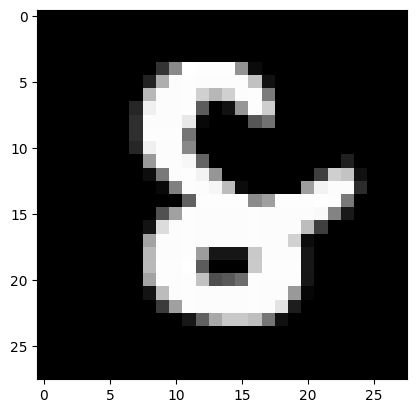

In [58]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [9]
Label:  9


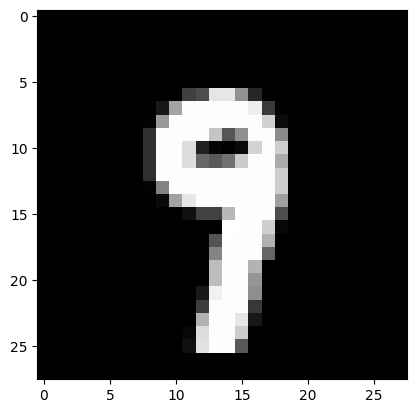

In [59]:
test_prediction(1, W1, b1, W2, b2)

In [ ]:
#The code is using a function called "test_prediction" to make a prediction for a single instance. 
#The function takes 5 arguments:

#A single instance of X represented by the integer "1".
#The values for the first set of weights, W1.
#The bias term for the first layer, b1.
#The values for the second set of weights, W2.
#The bias term for the second layer, b2.
#The function computes the forward propagation of the neural network to make a 
#prediction for the given instance. It first calculates the weighted sum of 
#the inputs and the bias term for the first layer, Z1. Then, it applies an 
#activation function (e.g. sigmoid) to get the activation values, A1, of the first layer. 
#The same process is repeated for the second layer. Finally, the function returns 
#the predicted value for the given instance.

Prediction:  [3]
Label:  5


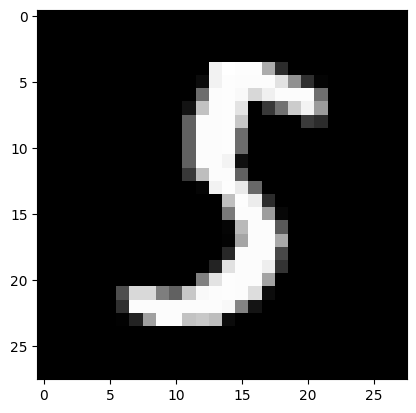

In [60]:
test_prediction(2, W1, b1, W2, b2)

Prediction:  [1]
Label:  1


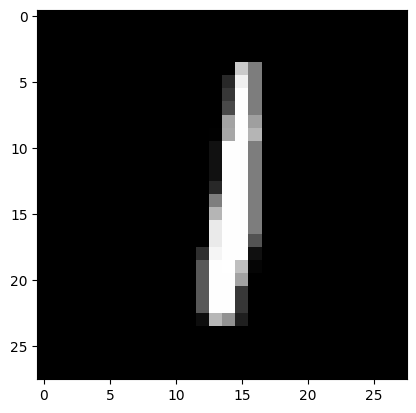

In [61]:
test_prediction(3, W1, b1, W2, b2)

SVM

INBUILT SVM

In [36]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = datasets.load_digits()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Train the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy: ", accuracy)

# Predict the labels of the testing data
y_pred = clf.predict(X_test)

# Create a confusion matrix to evaluate the performance of the model
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print(conf_matrix)


Accuracy:  0.9777777777777777
Predicted   0   1   2   3   4   5   6   7   8   9  All
True                                                  
0          33   0   0   0   0   0   0   0   0   0   33
1           0  28   0   0   0   0   0   0   0   0   28
2           0   0  33   0   0   0   0   0   0   0   33
3           0   0   0  32   0   1   0   0   0   1   34
4           0   1   0   0  45   0   0   0   0   0   46
5           0   0   0   0   0  47   0   0   0   0   47
6           0   0   0   0   0   0  35   0   0   0   35
7           0   0   0   0   0   0   0  33   0   1   34
8           0   0   0   0   0   1   0   0  29   0   30
9           0   0   0   1   1   0   0   1   0  37   40
All        33  29  33  33  46  49  35  34  29  39  360


NON INBUILT SVM

In [63]:
data = pd.read_csv("mnist_test.csv")

In [64]:
print(data.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [65]:
class SVM_classifier():


  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  
  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)



    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw

      self.b = self.b - self.learning_rate * db

    return self.w , self.b


  # predict the label for a given input value
  def predict(self,X):

    output = np.dot(X, self.w) - self.b
    
    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat

In [ ]:
#This is an implementation of a Support Vector Machine (SVM) classifier in Python. 
#The class has three attributes: learning rate, number of iterations, and lambda parameter, 
#which are set during the initiation of the class.

#The class has three main functions: fit, update_weights, and predict.

#The fit function takes in two inputs: X and Y. X is the input data, and Y is the target variable. 
#The function initializes the number of data points (m) and the number of features (n). 
#The function then initializes the weight and bias parameters 
#and performs gradient descent optimization for the specified number of iterations.

#The update_weights function performs label encoding on Y and updates the weight 
#and bias values using gradient descent. The gradient is calculated as a function of the error between the predicted output and actual output.

#The predict function takes in X as an input and returns the predicted label using the dot product of X 
#and the updated weight values, subtracting the bias value. The sign of the output is taken as the predicted label, 
#and the output is thresholded to 0 or 1 based on the value of the sign.

In [66]:
svm_classifier = SVM_classifier(learning_rate = 0.001 , no_of_iterations = 1000 , lambda_parameter= 0.01)

In [69]:
# Check if the "label" column exists
if "label" in data.columns:
    # Split the data into features and target variables
    X = data.drop("label", axis=1)
    y = data["label"]
else:
    print("The 'label' column was not found in the data.")

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit and transform the one-hot encoder on the training data
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(y_train.values.reshape(-1, 1))

# Transform the training and test data
y_train_encoded = onehot_encoder.transform(y_train.values.reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test.values.reshape(-1, 1))

In [71]:
y_pred = svm_classifier.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.11


KNN

INBUILT KNN

In [62]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9693571428571428


WITHOUT INBUILT KNN

In [2]:
import pandas as pd

In [8]:
df_train_data = pd.read_csv('train.csv')
df_test_data = pd.read_csv('test.csv')
df_train_data.head(10)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

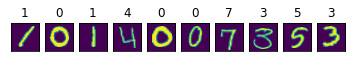

In [9]:
# The training data is in a format whereby the label (the digit represented, 0 through to 9) is in the first column.
# This is followed by 784 columns of pixels, pixel0 through to pixel783.
# Each image is 28 pixels by 28 pixels, therefore, a grid of 28x28 means a total number of 784 pixels.

# Separate out the pixel data from the labels for the training data:
df_train_labels = df_train_data['label']
df_train_data = df_train_data.drop(['label'], axis=1)

# The original images of the handwritten digits can be viewed using plt and reshaping each row 
# from the dataframe into a 2D image with a size of 28 by 28 pixels.
# This for loop will display the first 10 images from the training data, along with their labels:
for i in range(10):
    ax= plt.subplot(1,10 ,i+1)
    im=ax.imshow(df_train_data.iloc[i].values.reshape(28,28))
    plt.xlabel=''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.title(df_train_labels.iloc[i])

In [2]:
# The code is a pre-processing step for training a machine learning model to recognize handwritten digits. 
#The first block of code separates the labels (the digit represented) from the pixel data of the images in the training data. 
#The labels are stored in df_train_labels, while the pixel data is stored in df_train_data after dropping the label column. 
#The second block of code uses a for loop to display the first 10 images from the training data, along with their labels. 
#The images are displayed using plt.subplot and imshow, which shows the image as a matrix of 28x28 pixels. 
#The reshaping of each row of the dataframe into a 2D image is done using .values.reshape(28,28). 
#The x and y axis labels are turned off for each image using ax.axes.get_xaxis().set_visible(False) and ax.axes.get_yaxis().set_visible(False). 
#The digit label is displayed as the title of each image using plt.title(df_train_labels.iloc[i]).


SyntaxError: invalid syntax (3537368538.py, line 3)

4 DIFFERENT FUNCTIONS FOR KNN 

1)Calculate the distance between the current training point and the the new unclassified point

<Figure size 432x288 with 0 Axes>

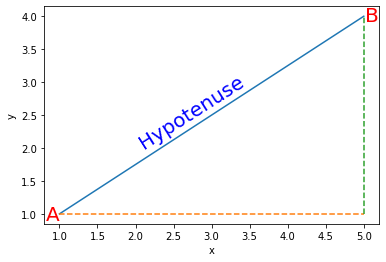

In [10]:
# Point A is [1,1]
# Point B is [5,4]

# Draw 2D right angle triangle
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot([1,5], [1,4], linestyle='solid')
ax.text(0.82,0.9, "A", color='red', size=20)
ax.text(5.01,3.92, "B", color='red', size=20)
ax.text(2,2, "Hypotenuse", color='blue', rotation=32.5, size=20)
# Add the x, y sides of the triangle
ax.plot([1,5], [1,1], linestyle='dashed')
ax.plot([5,5], [1,4], linestyle='dashed')

ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [ ]:
#The output is a 2D plot of a right-angled triangle with two points A and B denoted by red letters. 
#Point A is located at coordinates [1,1] and point B is located at coordinates [5,4]. 
#The hypotenuse of the triangle is represented by a solid line connecting points A and B. 
#The x,y sides of the triangle are represented by dotted lines. 
#The x-axis is labeled "x" and the y-axis is labeled "y". 
#The plot is displayed using the plt.show() function.

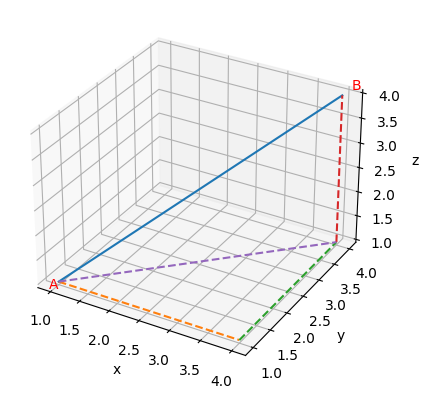

In [11]:
#MORE DIMENSIONS
# Draw 3D right angle pyramid
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update(plt.rcParamsDefault)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Point A is [1,1,1]
# Point B is [4,4,4]
ax.plot([1,4], [1,4], [1,4], linestyle='solid')
ax.text(0.9,0.9,0.9, "A", color='red')
ax.text(4.1,4.1,4.1, "B", color='red')
# Add the x, y and z sides of the triangular pyramid
ax.plot([1,4], [1,1], [1,1], linestyle='dashed')
ax.plot([4,4], [1,4], [1,1], linestyle='dashed')
ax.plot([4,4], [4,4], [1,4], linestyle='dashed')
ax.plot([1,4], [1,4], [1,1], linestyle='dashed')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [ ]:
#This code is a python script that draws a 3D right angle pyramid in a graphical plot. 
#It uses the mpl_toolkits.mplot3d library to plot the 3D graph.

#The fig variable creates an empty figure, then ax is added as a subplot to the figure with a projection of '3d', meaning it is a 3D plot.

#The two points A and B are defined with their x, y, and z coordinates [1,1,1] and [4,4,4] respectively. 
#These points are plotted as a solid line.

#Text labels "A" and "B" are added to the respective points with the ax.text function.

#The x, y, and z sides of the triangular pyramid are added with the ax.plot function, each having a dashed line style.

#Finally, the x, y, and z axis labels are set using the ax.set_xlabel, ax.set_ylabel, and ax.set_zlabel functions, respectively.

#The plot is shown using the plt.show() function.

In [13]:
import numpy as np

In [14]:
# With points 1,1,1 and 4,4,4, the length of each side is 4 - 1 = 3
# The length of the x side is 3, the length of the y side is 3, and the z side is 3
print("The Euclidean distance from A to B is equal to")
print(np.sqrt( 3**2 + 3**2 + 3**2 ))

The Euclidean distance from A to B is equal to
5.196152422706632


In [15]:
# We can define a function for 2 points in multiple dimensions

def euclid_distance(p1, p2):

    # Create an integer to store the running total sum
    sum_of_square_distances = 0
    for a,b in zip(p1,p2):
        # for each dimension, find the distance between the 2 points in that dimension, and square it
        # a and b represent the coordinate in the current dimension for points p1 and p2
        distance_in_this_dimension_squared = (a - b)**2
        sum_of_square_distances = sum_of_square_distances + distance_in_this_dimension_squared
    
    # The euclidean distance is the square root of the sum of all of the (distances in each dimension squared)
    euclidean_distance = np.sqrt(sum_of_square_distances)
    
    return euclidean_distance

# For 2 points which have coordinates in 6 dimensions:
point1 = (5,6,7,8,9,10)
point2 = (1,2,3,4,5,6)

print(euclid_distance(point1, point2))

9.797958971132712


2) Identify the labels of the "k" points in our dataset with the smallest distances to the new point

In [16]:
def labels_of_nearest_neighbours(np_list_of_distances, np_list_of_labels, k):
    
    """
    Arguments:
        np_list_of_distances: a numpy array of distances between the new point and the known/training points
        np_list_of_labels: a numpy array of labels for the known/training points
        k: integer of the number of nearest neighbours to consider
    Returns: the labels corresponding to the neighbours with the smallest distances.
    """
    # reshape both input lists from a row to a column
    np_list_of_distances = np_list_of_distances.reshape(-1,1)
    np_list_of_labels = np_list_of_labels.reshape(-1,1)
    
    # can now join the 2 columns together into an array and convert into a dataframe
    np_distances_and_labels = np.concatenate((np_list_of_distances,np_list_of_labels), axis = 1)
    labels_df = pd.DataFrame(np_distances_and_labels, columns=['distance','label'])
    
    # sort the entries in the dataframe by distance
    labels_df = labels_df.sort_values('distance')
    return labels_df['label'].head(k).values

In [ ]:
#The labels_of_nearest_neighbours function receives as input two numpy arrays, np_list_of_distances and np_list_of_labels, and an integer k.

#The function first converts the input numpy arrays into a dataframe with columns 'distance' and 'label' by reshaping the arrays and concatenating them.

#Then, the dataframe is sorted by the 'distance' column.

#Finally, the function returns the first k labels in the sorted dataframe as a numpy array.

3)Identify the most common label in a given set of labels

In [17]:
from collections import Counter

def most_common_label(np_arr_of_labels):
    """
    Arguments:
        np_list_of_labels: a numpy array of labels. 
    Returns: the most common label    
    """
    mostCommon = Counter(np_arr_of_labels).most_common(1)
    return mostCommon[0][0]


In [ ]:
#This code is for finding the most common label in an array of labels represented as a numpy array (np_arr_of_labels).

#It first uses the collections library's Counter function to count the number of occurrences of each label.

#The most_common method is then used to retrieve the label with the highest count.

#Finally, the function returns this label by accessing the first item of the first item in the resulting mostCommon list.

4) Bring it all together in the simple KNN

In [18]:
def simple_KNN( new_point, existing_points, labels_for_existing_points, k=2):
    """
    Arguments:
        new_point: a pandas Series corresponding to the new point with an unknown label.
        existing_points: a pandas DataFrame containing the known points
        labels_for_existing_points: a pandas Series containing the labels for the known points
        k: the number of nearest neighbours to consider when identifying the label for the new point
        If k is not specified, it defaults to 2
    Returns: the predicted label for the new point
    """
    row_count_of_existing_points = existing_points.shape[0]
    # Create an empty list of the distances
    list_of_distances = []
    
    # For each known point, calculate the euclidean distance between the known point and the new point
    # add the euclidean distance to the list_of_distances
    for i in range(row_count_of_existing_points):
        this_distance = euclid_distance(new_point, existing_points.iloc[i])
        list_of_distances.append(this_distance)
    
    # Using the list_of_distances, and the list of labels, identify the labels of the points with the 
    # smallest distance to the new point
    labels_of_k_nearest_neighbours = labels_of_nearest_neighbours(np.array(list_of_distances), np.array(labels_for_existing_points), k)
    
    # Identify the most common label in the nearest neighbours. This is the predicted label for the new point
    predicted_label_of_new_point = most_common_label(labels_of_k_nearest_neighbours)
    return predicted_label_of_new_point

# new point which is closest to the red dots
new_point = pd.Series([2,3])
# number of nearest neighbours (k) to use to classify a point: set to 2 for simplicity
k = 2

In [ ]:
#The simple_KNN function implements the K-nearest neighbor (KNN) algorithm for binary classification.

#Given a new data point new_point and existing points existing_points with their corresponding labels labels_for_existing_points, 
#the function performs the following steps:

#Calculates the Euclidean distance between new_point and each existing_point.

#Selects the k closest existing_points to new_point based on their Euclidean distances.

#Determines the most common label among the k closest existing_points.

#Returns the most common label as the predicted label of new_point.

In [19]:
df_test_data.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


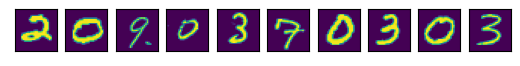

In [20]:
# Display the first images in the test set
for i in range(10):
    ax= plt.subplot(1,10 ,i+1)
    im=ax.imshow(df_test_data.iloc[i].values.reshape(28,28))
    plt.xlabel=''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

In [ ]:
#The code is using matplotlib to display the first 10 images from a test data set. 
#The test data set is stored in a pandas dataframe, df_test_data.

#For each iteration of the loop, a subplot with the index i is created in a grid of 1 row and 10 columns. 
#Then, the image is displayed using imshow method by reshaping the data into 28x28 pixels. 
#The x and y axis labels are removed by setting their visibility to false.

#Finally, the plot is displayed using the plt.show() method.

In [21]:
#set new_point equal to the first entry in the test data
# (from the above we can see that the first image is a number 2)
new_point = df_test_data.iloc[0]

In [22]:
# test by comparing the test image against the first 1000 entries 
# in the training data 
print(simple_KNN(new_point, df_train_data.head(1000), df_train_labels.head(1000), k))

2.0
